<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/tfm_v0_0_221022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
test_img_path = '/content/drive/MyDrive/IA3/TFM/archive/images/BikesHelmets0.png'

In [4]:
test_dat_path = '/content/drive/MyDrive/IA3/TFM/archive/annotations/BikesHelmets0.xml'

In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt; 
import matplotlib.patches as patches
from tensorflow.keras.utils import load_img

In [6]:
import xml.etree.ElementTree as ET

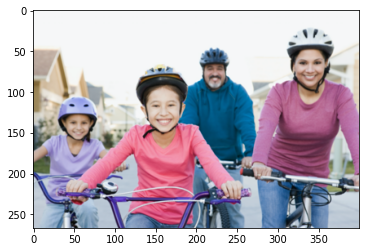

In [7]:
image = load_img(test_img_path)
plt.imshow(image) 

In [8]:
xml_file = open(test_dat_path)
print(xml_file.read())


<annotation>
    <folder>images</folder>
    <filename>BikesHelmets0.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>29</xmin>
            <ymin>105</ymin>
            <xmax>82</xmax>
            <ymax>160</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>122</xmin>
            <ymin>66</ymin>
            <xmax>193</xmax>
            <ymax>154</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</tr

In [9]:
tree=ET.parse(test_dat_path)
root=tree.getroot()
print(ET.tostring(root))

b'<annotation>\n    <folder>images</folder>\n    <filename>BikesHelmets0.png</filename>\n    <size>\n        <width>400</width>\n        <height>267</height>\n        <depth>3</depth>\n    </size>\n    <segmented>0</segmented>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>29</xmin>\n            <ymin>105</ymin>\n            <xmax>82</xmax>\n            <ymax>160</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>122</xmin>\n            <ymin>66</ymin>\n            <xmax>193</xmax>\n            <ymax>154</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspe

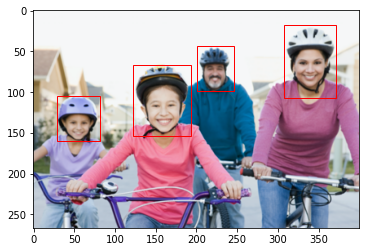

In [10]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Create a Rectangle patch
    rect = patches.Rectangle((int(xmin), int(ymin)), int(w), int(h), linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

In [37]:
#yolo test
import cv2 as cv
from google.colab.patches import cv2_imshow
import time

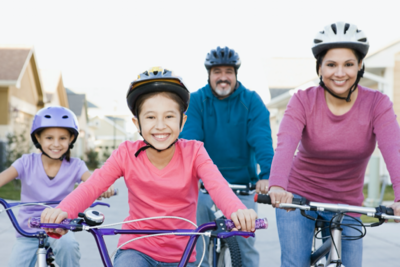

In [22]:
img = cv.imread(test_img_path)
cv2_imshow(img)

In [30]:
net = cv.dnn.readNetFromDarknet('/content/drive/MyDrive/IA3/TFM/yolo/yolov3.cfg', '/content/drive/MyDrive/IA3/TFM/yolo/yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

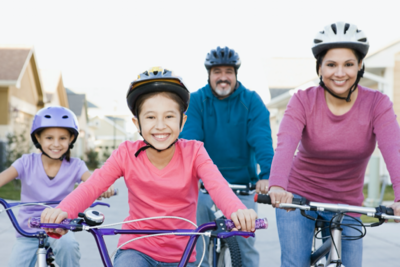

In [43]:

ln = net.getLayerNames()
print(len(ln), ln)

blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
r = blob[0, 0, :, :]

net.setInput(blob)
t0 = time.time()
outputs = net.forward(ln)
t = time.time()

cv2_imshow( img)


In [44]:
net.setInput(blob)
t0 = time.time()
outputs = net.forward(ln)
t = time.time()

In [46]:
net.setInput(blob)
outputs = net.forward(ln)
outputs

(array([[[[-1.34728765e+00, -1.12945807e+00, -1.12469602e+00, ...,
           -1.12929332e+00, -1.12929332e+00, -1.42694473e+00],
          [-1.29718876e+00, -1.16786098e+00, -1.16270363e+00, ...,
           -1.16716826e+00, -1.16716826e+00, -1.33936548e+00],
          [-1.29718876e+00, -1.16729760e+00, -1.16843665e+00, ...,
           -1.16716826e+00, -1.16716826e+00, -1.33936548e+00],
          ...,
          [-1.04527438e+00, -9.39695835e-01, -9.39702451e-01, ...,
           -9.09811616e-01, -9.11662042e-01, -1.03658402e+00],
          [-1.04828095e+00, -9.42781270e-01, -9.42196488e-01, ...,
           -9.08050179e-01, -9.09875274e-01, -1.03132892e+00],
          [ 1.06673136e-01,  1.87349886e-01,  1.87411845e-01, ...,
            1.82251558e-01,  1.81641340e-01,  1.30665779e-01]],
 
         [[-4.83777463e-01, -6.55387402e-01, -6.55710638e-01, ...,
           -6.55513108e-01, -6.55513108e-01, -7.75550127e-01],
          [-8.77133131e-01, -1.58944356e+00, -1.58748794e+00, ...,
     